In [ ]:
import numpy as np
np.random.seed(0)

Download and extract data

In [ ]:
!wget "https://files.grouplens.org/datasets/movielens/ml-latest-small.zip" .

--2021-11-23 10:32:48--  https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K  --.-KB/s    in 0.1s    

2021-11-23 10:32:49 (8.00 MB/s) - ‘ml-latest-small.zip’ saved [978202/978202]

--2021-11-23 10:32:49--  http://./
Resolving . (.)... failed: No address associated with hostname.
wget: unable to resolve host address ‘.’
FINISHED --2021-11-23 10:32:49--
Total wall clock time: 0.5s
Downloaded: 1 files, 955K in 0.1s (8.00 MB/s)


In [ ]:
import zipfile

In [ ]:
my_zipfile = zipfile.ZipFile("ml-latest-small.zip", mode='r')
print('Extracting all file...')
my_zipfile.extractall()
print('Extracting Done!')
my_zipfile.close()

Extracting all file...
Extracting Done!


load data

In [ ]:
import pandas as pd

In [ ]:
movies_data = pd.read_csv('ml-latest-small/movies.csv')

In [ ]:
movies_data

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
rating_data = pd.read_csv('ml-latest-small/ratings.csv')

In [ ]:
del rating_data['timestamp']

In [ ]:
rating_data

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [ ]:
rating_data = rating_data[rating_data.rating >= 3]

In [ ]:
rating_data.movieId.value_counts()

356       315
318       313
296       287
593       263
2571      257
         ... 
26732       1
8293        1
6178        1
114713      1
8196        1
Name: movieId, Length: 8452, dtype: int64

In [ ]:
transactions = rating_data.groupby(by='userId').agg({'movieId': lambda x: x.tolist()})

In [ ]:
transactions

,movieId
userId,
1,"[1, 3, 6, 47, 50, 70, 101, 110, 151, 157, 163,..."
2,"[318, 333, 1704, 3578, 6874, 8798, 46970, 4851..."
3,"[849, 1275, 1371, 1587, 2288, 2851, 3024, 3703..."
4,"[21, 45, 52, 58, 106, 125, 162, 171, 176, 215,..."
5,"[1, 21, 34, 36, 39, 50, 58, 110, 150, 153, 232..."
...,...
606,"[15, 17, 18, 28, 29, 32, 36, 46, 47, 50, 58, 6..."
607,"[1, 11, 25, 34, 36, 86, 110, 150, 153, 165, 18..."
608,"[10, 16, 21, 31, 32, 34, 39, 47, 50, 70, 104, ..."


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(transactions.movieId).transform(transactions.movieId)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [ ]:
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,184349,184471,184721,184791,184931,184987,184997,185029,185031,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189111,189333,190183,190209,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
0,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
605,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [ ]:
frequent_itemsets = apriori(df, min_support=0.08, use_colnames=True)

In [ ]:
frequent_itemsets

,support,itemsets
0,0.326765,(1)
1,0.146141,(2)
2,0.162562,(6)
3,0.193760,(10)
4,0.098522,(11)
...,...,...
126658,0.080460,"(5952, 4993, 4226, 260, 2571, 1196, 2959, 7153..."
126659,0.082102,"(5952, 4993, 356, 296, 2571, 1196, 7153, 1210,..."
126660,0.083744,"(5952, 4993, 356, 296, 2571, 1196, 2959, 7153,..."
126661,0.080460,"(5952, 4993, 356, 2571, 1196, 2959, 7153, 1210..."


In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

In [ ]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(2),(1),0.146141,0.326765,0.083744,0.573034,1.753656,0.035990,1.576787
1,(6),(1),0.162562,0.326765,0.087028,0.535354,1.638343,0.033908,1.448918
2,(32),(1),0.280788,0.326765,0.151067,0.538012,1.646478,0.059316,1.457255
3,(34),(1),0.170772,0.326765,0.111658,0.653846,2.000966,0.055856,1.944901
4,(104),(1),0.133005,0.326765,0.085386,0.641975,1.964638,0.041924,1.880414
...,...,...,...,...,...,...,...,...,...
2133365,"(4993, 1210)","(5952, 4226, 356, 2571, 1196, 7153, 318)",0.154351,0.085386,0.080460,0.521277,6.104951,0.067280,1.910527
2133366,"(4226, 1196)","(5952, 4993, 356, 2571, 7153, 1210, 318)",0.139573,0.090312,0.080460,0.576471,6.383102,0.067855,2.147874
2133367,"(7153, 4226)","(5952, 4993, 356, 2571, 1196, 1210, 318)",0.154351,0.091954,0.080460,0.521277,5.668883,0.066267,1.896807
2133368,"(1210, 4226)","(5952, 4993, 356, 2571, 1196, 7153, 318)",0.123153,0.095238,0.080460,0.653333,6.860000,0.068731,2.609890


In [ ]:
from itertools import combinations

In [ ]:
def get_sugg(movie_ids):
  recomm = rules[rules.antecedents == frozenset(movie_ids)].sort_values(by='confidence',ascending=False).head(4)[['consequents', 'confidence']]
  f_recomm = []
  for ind in recomm.index:
    for each in recomm['consequents'][ind]:
      f_recomm.append((recomm['confidence'][ind], each))
  return f_recomm

In [ ]:
def get_top4_recommendations(input_movies):
  default_sugg = [1,2,6,10]
  movie_ids = movies_data[movies_data.title.isin(input_movies)].movieId.tolist()
  # print(movie_ids)
  set_len = 3
  sugg = []
  while len(sugg) < 4 and set_len > 0: 
    movie_sug = []
    for each in combinations(movie_ids, set_len):
      movie_sug.extend(get_sugg(each))
    movie_sug = sorted(movie_sug)
    movie_sug = [i[1] for i in movie_sug]
    movie_sug = [i for i in movie_sug if i not in movie_ids]
    for i in movie_sug:
      if i not in sugg:
        sugg.append(i)
    set_len -= 1
  if len(sugg) > 4:
    sugg = sugg[:4]
  else:
    sugg_needed = 4 - len(sugg)
    sugg.extend(default_sugg[:sugg_needed])
  movie_names = movies_data[movies_data.movieId.isin(sugg)].title.tolist()
  return movie_names

In [ ]:
test_data = pd.read_csv('sample_test.tsv')

In [ ]:
test_data

,movies
0,Jumanji (1995)
1,Toy Story (1995)
2,"Dark Knight, The (2008)\nDark Knight Rises, Th..."
3,Inception (2010)
4,Titanic (1997)
5,"Dark Knight, The (2008)"


In [ ]:
def recommend(row):
  input_movies = row.movies.strip().split('\n')
  return '\n'.join(get_top4_recommendations(input_movies))

test_data['recommendation'] = test_data.apply(lambda row: recommend(row), axis=1)
test_data

,movies,recommendation
0,Jumanji (1995),Toy Story (1995)\nForrest Gump (1994)\nLion Ki...
1,Toy Story (1995),Star Wars: Episode IV - A New Hope (1977)\nPul...
2,"Dark Knight, The (2008)\nDark Knight Rises, Th...","Matrix, The (1999)\nLord of the Rings: The Fel..."
3,Inception (2010),"Shawshank Redemption, The (1994)\nForrest Gump..."
4,Titanic (1997),"Shawshank Redemption, The (1994)\nForrest Gump..."
5,"Dark Knight, The (2008)","Shawshank Redemption, The (1994)\nForrest Gump..."


In [ ]:
test_data.to_csv('output.tsv', index = False, sep='\t')

To check if everything is working fine

In [ ]:
# input_movies = ['Dark Knight, The (2008)', 'Dark Knight Rises, The (2012)', 'Jumanji (1995)', 'Toy Story (1995)']
# input_movies = ['Jumanji (1995)']
input_movies = ['Inception (2010)']
get_top4_recommendations(input_movies)

['Shawshank Redemption, The (1994)',
 'Forrest Gump (1994)',
 'Matrix, The (1999)',
 'Dark Knight, The (2008)']

In [ ]:
rules[rules.antecedents == frozenset([102033])]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [ ]:
frequent_itemsets[frequent_itemsets.itemsets == frozenset([102033])]

,support,itemsets



# Visualising maximal frequent pattern on sample data




In [ ]:
sample = rating_data[rating_data.rating > 4].sample(5000, random_state=0)

In [ ]:
sample

,userId,movieId,rating
84184,537,55765,5.0
84340,541,161,5.0
68596,447,288,5.0
83589,534,180,4.5
18923,122,3020,4.5
...,...,...,...
10327,67,356,4.5
9138,62,168252,5.0
18252,115,3555,5.0
70580,450,2028,5.0


In [ ]:
transactions_sample = sample.groupby(by='userId').agg({'movieId': lambda x: x.tolist()})

In [ ]:
te_sample = TransactionEncoder()
te_ary_sample = te_sample.fit(transactions_sample.movieId).transform(transactions_sample.movieId)
df_sample = pd.DataFrame(te_ary_sample, columns=te_sample.columns_)

In [ ]:
frequent_itemsets_sample = apriori(df_sample, min_support=0.005, use_colnames=True)

In [ ]:
frequent_itemsets_sample

,support,itemsets
0,0.027778,(1)
1,0.011111,(2)
2,0.016667,(6)
3,0.007407,(11)
4,0.012963,(16)
...,...,...
787,0.005556,"(1210, 260, 2959)"
788,0.005556,"(858, 1221, 318)"
789,0.005556,"(318, 2571, 1198)"
790,0.005556,"(858, 1221, 1213)"


In [ ]:
su = frequent_itemsets_sample.support.unique()#all unique support count
fredic2 = {}
for i in range(len(su)):
    inset2 = list(frequent_itemsets_sample.loc[frequent_itemsets_sample.support<=su[i]]['itemsets'])
    fredic2[su[i]] = inset2

In [ ]:
ml = []
for index, row in frequent_itemsets_sample.iterrows():
    isclose = True
    cli = row['itemsets']
    cls = row['support']
    checkset = fredic2[cls]
    for i in checkset:
        if (cli!=i):
            if(frozenset.issubset(cli,i)):
                isclose = False
                break
    
    if(isclose):
        ml.append(row['itemsets'])

In [ ]:
a = ml[-5:]
a

[frozenset({260, 1210, 2959}),
 frozenset({318, 858, 1221}),
 frozenset({318, 1198, 2571}),
 frozenset({858, 1213, 1221}),
 frozenset({2959, 5952, 8368})]

In [ ]:
nodes = []
for i in frequent_itemsets_sample['itemsets']:
    for j in range(len(a)):
      if frozenset.issubset(i,a[j]) and i not in nodes:
        nodes.append(i)   

In [ ]:
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import matplotlib.pyplot as plt

In [ ]:
H = nx.Graph()
for i in range(len(nodes)):
  H.add_node(i)
for i in range(len(nodes)):
  for j in range(len(nodes)):
    if  i!=j and frozenset.issubset(nodes[i],nodes[j]) and len(nodes[i])+1 == len(nodes[j]):
      H.add_edge(i, j)

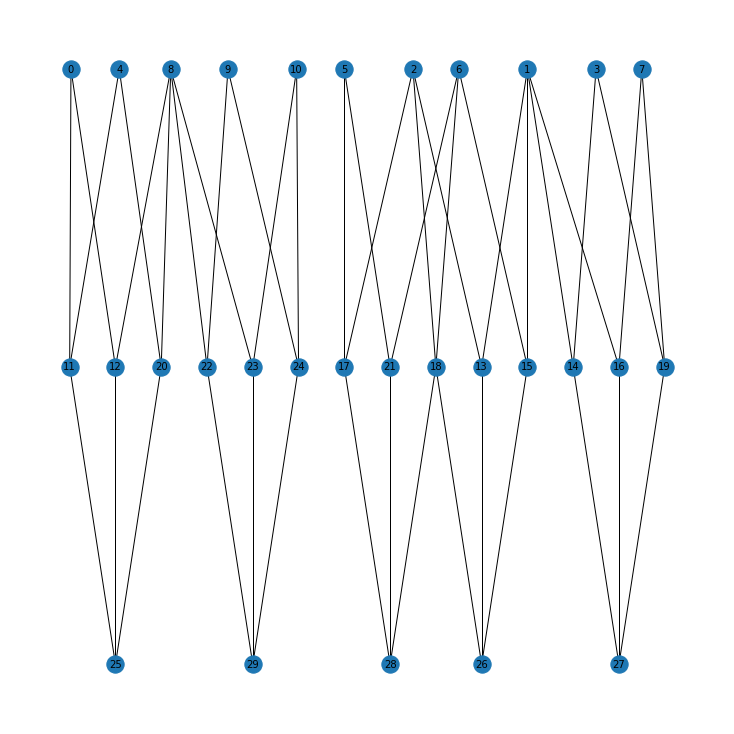

In [ ]:

plt.figure(figsize=(10,10))
pos = graphviz_layout(H, prog="dot")
nx.draw(H, pos, with_labels=True, font_size=10)
plt.show()

In [ ]:
label_dict = {}
for i in range(len(nodes)):
  names = []
  for each in nodes[i]:
    names.append(movies_data[movies_data.movieId == each].title.item())
  label_dict[i] = names

In [ ]:
from pprint import pprint

In [ ]:
pprint(label_dict)

{0: ['Star Wars: Episode IV - A New Hope (1977)'],
 1: ['Shawshank Redemption, The (1994)'],
 2: ['Godfather, The (1972)'],
 3: ['Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) '
     '(1981)'],
 4: ['Star Wars: Episode VI - Return of the Jedi (1983)'],
 5: ['Goodfellas (1990)'],
 6: ['Godfather: Part II, The (1974)'],
 7: ['Matrix, The (1999)'],
 8: ['Fight Club (1999)'],
 9: ['Lord of the Rings: The Two Towers, The (2002)'],
 10: ['Harry Potter and the Prisoner of Azkaban (2004)'],
 11: ['Star Wars: Episode VI - Return of the Jedi (1983)',
      'Star Wars: Episode IV - A New Hope (1977)'],
 12: ['Star Wars: Episode IV - A New Hope (1977)', 'Fight Club (1999)'],
 13: ['Godfather, The (1972)', 'Shawshank Redemption, The (1994)'],
 14: ['Shawshank Redemption, The (1994)',
      'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) '
      '(1981)'],
 15: ['Godfather: Part II, The (1974)', 'Shawshank Redemption, The (1994)'],
 16: ['Matrix, Th

In [ ]:
support_dict = {}
for i in range(len(nodes)):
  support_dict[i] = frequent_itemsets_sample[frequent_itemsets_sample.itemsets == frozenset(nodes[i])].support.item()

In [ ]:
pprint(support_dict)

{0: 0.05185185185185185,
 1: 0.07407407407407407,
 2: 0.03888888888888889,
 3: 0.03888888888888889,
 4: 0.037037037037037035,
 5: 0.02962962962962963,
 6: 0.03148148148148148,
 7: 0.05925925925925926,
 8: 0.05555555555555555,
 9: 0.02962962962962963,
 10: 0.014814814814814815,
 11: 0.007407407407407408,
 12: 0.009259259259259259,
 13: 0.007407407407407408,
 14: 0.007407407407407408,
 15: 0.007407407407407408,
 16: 0.009259259259259259,
 17: 0.012962962962962963,
 18: 0.009259259259259259,
 19: 0.007407407407407408,
 20: 0.005555555555555556,
 21: 0.005555555555555556,
 22: 0.007407407407407408,
 23: 0.007407407407407408,
 24: 0.005555555555555556,
 25: 0.005555555555555556,
 26: 0.005555555555555556,
 27: 0.005555555555555556,
 28: 0.005555555555555556,
 29: 0.005555555555555556}
